In [17]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
diabetes = pd.read_csv("diabetes.csv")

# This diabetes data is of females at least 21 years old of Pima Indian heritage. The data sets original owners are the National Institute of Diabetes and Digestive and Kidney Diseases. In the outcome column, 1 = tested positive and 0 = tested negative.

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

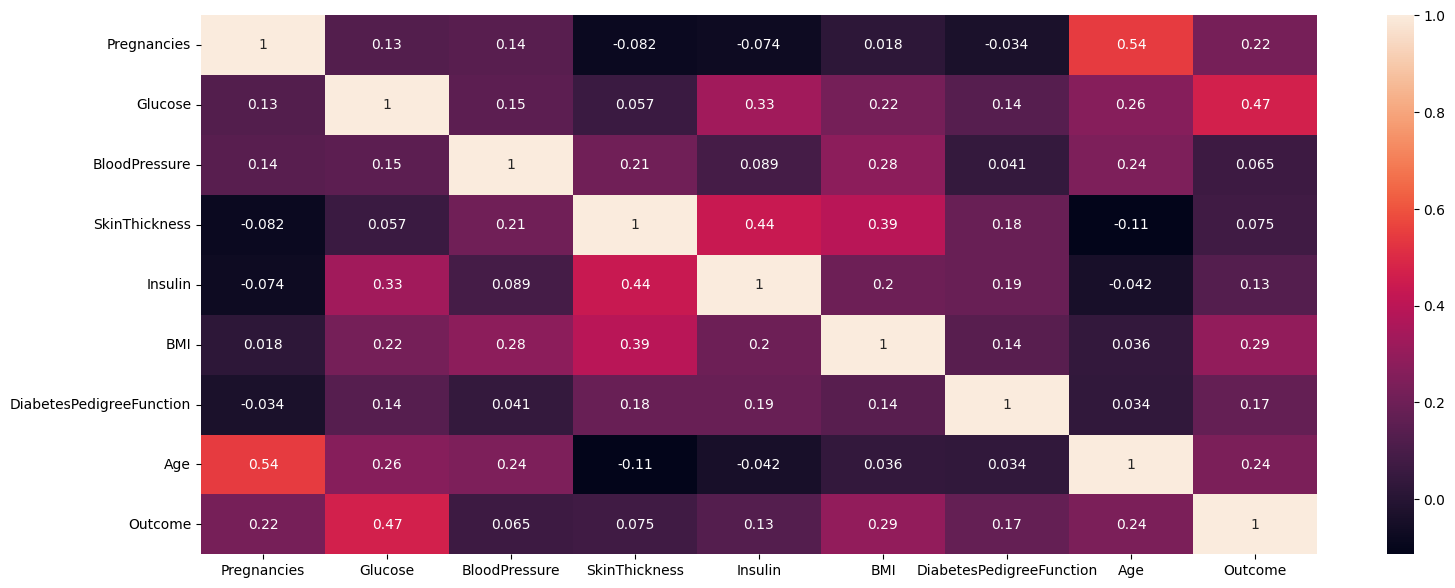

In [8]:
plt.figure(figsize=(18, 7))
sns.heatmap(diabetes.corr(numeric_only=True), annot = True)

# For this evaluation, I will try to use only neural networks to try to get as close of an accuracy score as possible. I will adjust the hyperparameters accordingly. First, however, i will split the data and scale it accordingly

In [13]:
X = diabetes.drop(['Outcome'], axis=1) # Set axis = 1 when dropping so there are no dimensional problems later
y = diabetes['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 9) # Random state helps reproductibility

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [19]:
tf.random.set_seed(9)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(8,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(X_train_s, y_train, epochs = 100)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8057 - mae: 0.8057  
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5804 - mae: 0.5804 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4296 - mae: 0.4296 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3392 - mae: 0.3392 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3136 - mae: 0.3136 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3104 - mae: 0.3104 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3093 - mae: 0.3093 
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3096 - mae: 0.3096 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3093 - mae: 0.3093 
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3091 - mae: 0.3091 
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3094 - mae: 0.3094 
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3094 - mae: 0.3094 
Epoch 13/100
17/17 ━━━━━

In [22]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

In [23]:
loss, accuracy = model_1.evaluate(X_test_s, y_test)
print("Accuracy score (Keras):", accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3497 - mae: 0.3497 
Accuracy score (Keras): 0.349744588136673


In [30]:
tf.random.set_seed(9)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(8,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
                metrics = ["mae"])

# 3. Fit the model
model_2.fit(X_train_s, y_train, epochs = 100)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4788 - mae: 0.4788
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3325 - mae: 0.3325 
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3314 - mae: 0.3314 
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3388 - mae: 0.3388 
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3287 - mae: 0.3287 
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3352 - mae: 0.3352 
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3288 - mae: 0.3288 
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3280 - mae: 0.3280 
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3302 - mae: 0.3302 
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3297 - mae: 0.3297 
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3247 - mae: 0.3247 
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3341 - mae: 0.3341 
Epoch 13/100
17/17 ━━━━━━━

In [26]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204 (820.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103 (416.00 B)

In [35]:
loss, accuracy = model_2.evaluate(X_test_s, y_test)
print("Accuracy score (Keras):", accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3472 - mae: 0.3472 
Accuracy score (Keras): 0.3472011685371399


# Slightly lower, though the difference in negligible. I do think Adam optimizer is better, and I will continue using that in the next models

In [32]:
tf.random.set_seed(9)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(8,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics = ["mae"])

# 3. Fit the model
model_3.fit(X_train_s, y_train, epochs = 200, verbose = 0) # Set verbose = 0 bc it would be too many epochs to visualize

In [33]:
model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,305 (130.10 KB)

 Trainable params: 11,101 (43.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,204 (86.74 KB)

In [38]:
loss, accuracy = model_3.evaluate(X_test_s, y_test)
print("Accuracy score (Keras):", accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3486 - mae: 0.3486 
Accuracy score (Keras): 0.3485848903656006


# It seems to be staying at the 40% range, no matter how many iterations or things I try to change. I will try one more big change in the hyperparameters, then move onto other methods of ML to get a higher accuracy score

# In the future, I want to look at how to automate hyperparameter tuning, like how I used GridSearchCV for my house prediction tuning. This will make it much easier to find better hyperparameters, and i won't need to tune them myself

In [39]:
tf.random.set_seed(9)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(8,)),
    tf.keras.layers.Dense(500, activation = 'tanh'),
    tf.keras.layers.Dense(100, activation = 'tanh'),
    tf.keras.layers.Dense(1, activation = "sigmoid") #Sigmoid is best suited for output layer for binary classfication, whcih is what we have here
])

# 2. Compile the Model
model_4.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["mae"])

# 3. Fit the model
model_4.fit(X_train_s, y_train, epochs = 500, verbose = 0) # Set verbose = 0 bc it would be too many epochs to visualize

In [40]:
model_4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 500)            │         4,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,105 (641.04 KB)

 Trainable params: 54,701 (213.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 109,404 (427.36 KB)

In [41]:
loss, accuracy = model_4.evaluate(X_test_s, y_test)
print("Accuracy score (Keras):", accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2610 - mae: 0.2610 
Accuracy score (Keras): 0.2609909474849701


# Wow, this made my accuracy score even lower! There defintely is a right and wrong way to train nn, and it's clear I ended up going the wrong way. I will definitely have to be more careful training nn like these in teh future

In [50]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model_5 = KNeighborsClassifier(n_neighbors=6) # n_neighbors refers to the number of nearest data points that the algorithm considers when making a prediction for a new, unclassified data point.
model_5.fit(X_train_s, y_train)
y_pred = model_5.predict(X_test_s)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.7142857142857143


In [57]:
# XGBoost
import xgboost as xgb
model_6 = xgb.XGBClassifier(random_state=1)
model_6.fit(X_train_s, y_train)
y_pred = model_6.predict(X_test_s)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.70995670995671


In [58]:
from sklearn.svm import SVC
model_7 = SVC()
model_7.fit(X_train_s,y_train)
pred_y = model_7.predict(X_test_s)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,pred_y))

Accuracy Score: 0.70995670995671


# Out of the 4 neural networks tested, the highest accuracy was 34.9%, and it was from the simplest model, with only one dense layer and Adam optimizer
# Out of the three other methods tested, KNN was the best, and the best n_neighbors value was tied between 5 and 6

# My KNN model can accurately predict if a female who is at least 21 and of prima indian heritage has diabetes 70% of the time. Things I can improve could be a larger sample size, or maybe other Machine Learning methods